# <div align="center"> IF540 MACHINE LEARNING </div>
## <div align="center"> Covid Detection Based On Symtomps</div>
### <div align="center"> Linear Discriminant Analysis </div>

#### <div align="center"> Semester Ganjil 2022/2023 </div>


---

### Dataset yang dipakai:

https://www.kaggle.com/datasets/hemanthhari/symptoms-and-covid-presence?resource=download

### Referensi yang dipakai:

https://www.kaggle.com/code/midouazerty/symptoms-covid-19-using-7-machine-learning-98
https://www.kaggle.com/code/meesalasaidhanush/symptoms-and-covid-presence-99-acc
https://www.kaggle.com/code/dzuljalali/covid-19-classification-using-svm-svc

### Hasil kerja

#### Library

In [122]:
# import the Libraries
import numpy as np
import pandas as pd

# visualisasi data
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# dataprep
from dataprep.eda import *
from dataprep.eda.missing import plot_missing
from dataprep.eda import plot_correlation

# splitting the dataset into train set and test set
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix

# LDA
## feature scaling
from sklearn.preprocessing import StandardScaler

## import LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# remove warning
import warnings
warnings.filterwarnings('ignore')

#### Import Dataset

In [123]:
# Melakukan Import dataset covid yang berasal dari https://www.kaggle.com/datasets/hemanthhari/symptoms-and-covid-presence?resource=download
df = pd.read_csv('Covid Dataset.csv')

#### Data Preprocessing

Kita melakukan data preprocessing adalah agar untuk mempersiapkan data agar dapat digunakan untuk proses training dan testing. Terlebih dari itu, dengan melakukan data preprocessing kita juga dapat lebih memahami data terlebih dahulu sebelum melakukan processing.

##### Data Information

In [124]:
# Melihat 5 data teratas, dari data ini kita dapat melihat bahwa data ini memiliki 21 Kolum (Feature)
df.head(5)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [125]:
# Dari metode ini, kita dapat melihat bahwa dari setiap feature, terdapat setidaknya 1 data unik dan maksimum 2 data unik pada setiap feature
df.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,...,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,...,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,...,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


In [126]:
# Menampilkan jumlah data, dan jumlah feature pada data
df.shape

(5434, 21)

In [127]:
# Dari metode ini, kita dapat melihat fitur - fitur apa saja yang ada pada dataset ini
df.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [128]:
# Dari metode ini, kita dapat melihat berapa banyak data yang hilang. Didapatkan bahwa pada setiap feature, tidak ada data yang hilang, maka dari itu tidak perlu dilakukan pengisian data yang hilang
missing_values=df.isnull().sum() # Melakukan penjumlahan data yang hilang
percent_missing = df.isnull().sum()/df.shape[0]*100 # Melihat berapa persen data yang hilang

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing  
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
Breathing Problem,0,0.0
Fever,0,0.0
Dry Cough,0,0.0
Sore throat,0,0.0
Running Nose,0,0.0
Asthma,0,0.0
Chronic Lung Disease,0,0.0
Headache,0,0.0
Heart Disease,0,0.0
Diabetes,0,0.0


<AxesSubplot:xlabel='COVID-19', ylabel='count'>

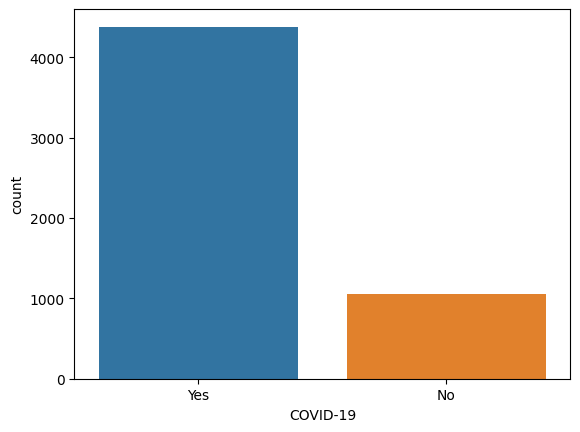

In [129]:
# Melihat jumlah data yang ada pada setiap kelas. Didapatkan bahwa terdapat lebih dari 4000 data yang terindentifikasi positif covid, dan lebih dari 1000 data yang terindentifikasi negatif covid
sns.countplot(x='COVID-19',data=df)

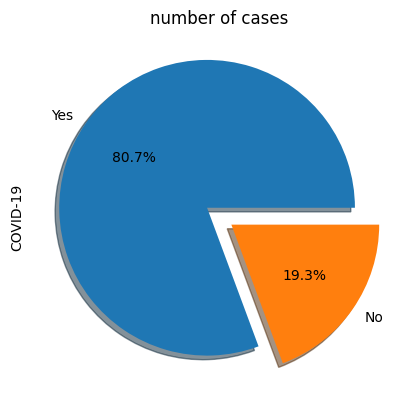

In [130]:
# Dari data atas, kita juga dapat mencari tahu persentase dari setiap kelas.
df["COVID-19"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('number of cases');

#### Visualisasi Data

##### Breathing Problem

<AxesSubplot:xlabel='Breathing Problem', ylabel='count'>

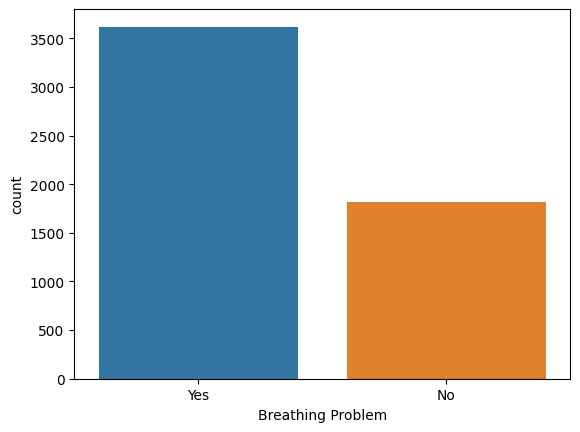

In [131]:
sns.countplot(x='Breathing Problem',data=df)

##### Fever

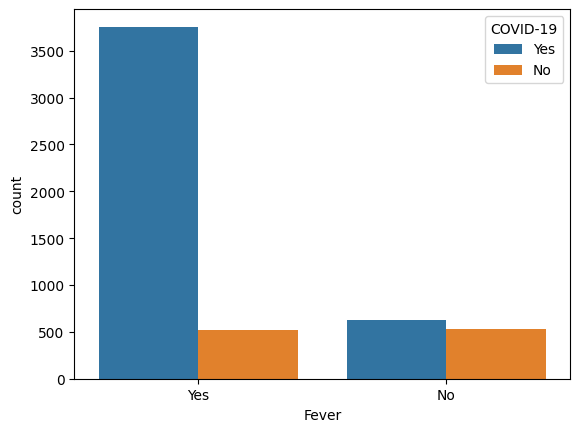

In [132]:
sns.countplot(x='Fever',hue='COVID-19',data=df);

##### Dry Cough

<AxesSubplot:xlabel='Dry Cough', ylabel='count'>

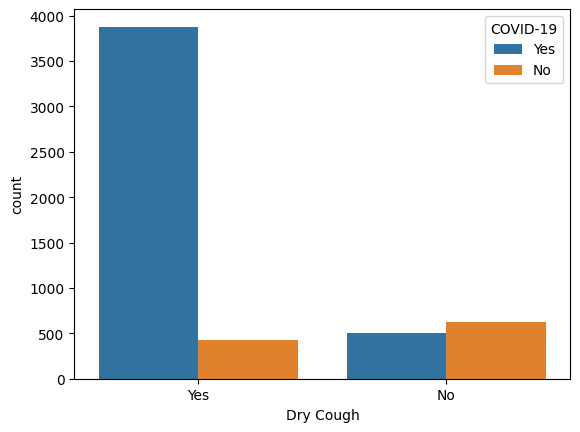

In [133]:
sns.countplot(x='Dry Cough',hue='COVID-19',data=df)

##### Sore Throat

<AxesSubplot:xlabel='Sore throat', ylabel='count'>

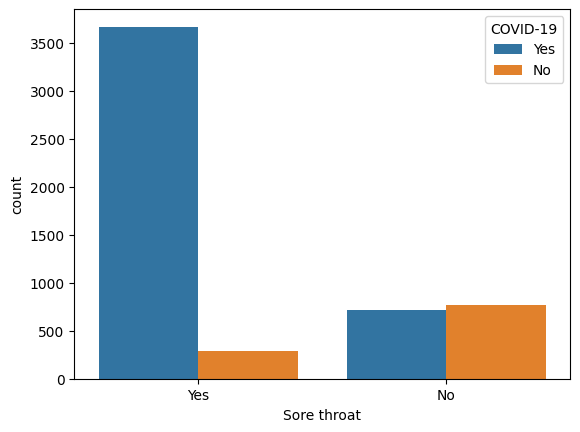

In [134]:
sns.countplot(x='Sore throat',hue='COVID-19',data=df)

#### Feature Transformation

In [135]:
# melakukan feature transformation, Kita menggunakan label encoder karena dengannya kita dapat melakukan normalisasi label data
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()

In [136]:
# Sebelum dilakukan fitur transformasi. Data masih dalam bentuk yes/no
df.head(5)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [137]:

# Merubah data yang masih dalam bentuk yes/no menjadi 1/0
df['Breathing Problem']=e.fit_transform(df['Breathing Problem'])
df['Fever']=e.fit_transform(df['Fever'])
df['Dry Cough']=e.fit_transform(df['Dry Cough'])
df['Sore throat']=e.fit_transform(df['Sore throat'])
df['Running Nose']=e.fit_transform(df['Running Nose'])
df['Asthma']=e.fit_transform(df['Asthma'])
df['Chronic Lung Disease']=e.fit_transform(df['Chronic Lung Disease'])
df['Headache']=e.fit_transform(df['Headache'])
df['Heart Disease']=e.fit_transform(df['Heart Disease'])
df['Diabetes']=e.fit_transform(df['Diabetes'])
df['Hyper Tension']=e.fit_transform(df['Hyper Tension'])
df['Fatigue ']=e.fit_transform(df['Fatigue '])
df['Gastrointestinal ']=e.fit_transform(df['Gastrointestinal '])
df['Abroad travel']=e.fit_transform(df['Abroad travel'])
df['Contact with COVID Patient']=e.fit_transform(df['Contact with COVID Patient'])
df['Attended Large Gathering']=e.fit_transform(df['Attended Large Gathering'])
df['Visited Public Exposed Places']=e.fit_transform(df['Visited Public Exposed Places'])
df['Family working in Public Exposed Places']=e.fit_transform(df['Family working in Public Exposed Places'])
df['Wearing Masks']=e.fit_transform(df['Wearing Masks'])
df['Sanitization from Market']=e.fit_transform(df['Sanitization from Market'])
df['COVID-19']=e.fit_transform(df['COVID-19'])

In [138]:
# Dari data dibawah, dapat dilihat bahwa fitur transformasi berhasil dilakukan.
df.head(5)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


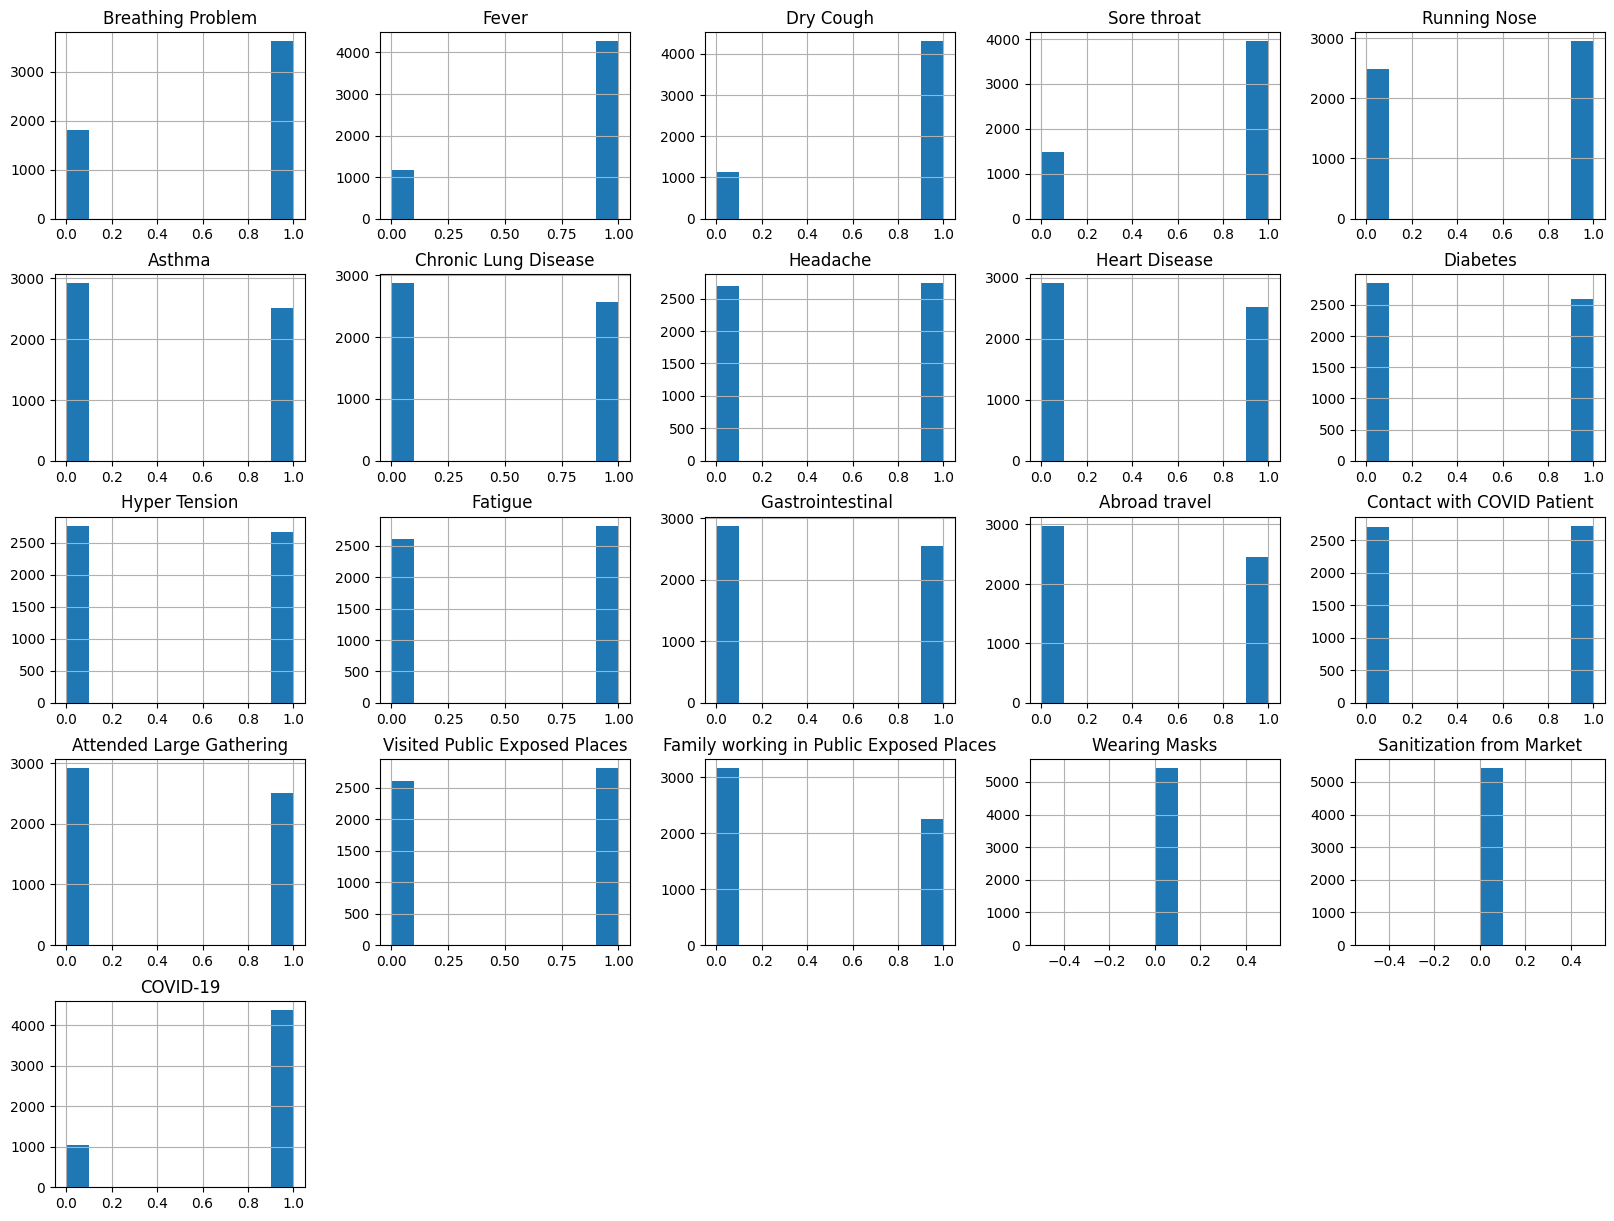

In [139]:
df.hist(figsize=(20,15));

#### Correlation Between Features

In [140]:
# Setelah kita melakukan feature transformation, kita akan melakukan test korelasi. Kita melakukan test ini agar kita dapat menghilangkan data - data atau fitur - fitur yang 
# memiliki korelasi yang kecil. Sehingga tidak terjadi overfitting pada data kita.
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm',axis=None)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,0.045256,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,nan,nan,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,0.079001,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,nan,nan,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,0.081989,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,nan,nan,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,0.042811,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,nan,nan,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,-0.020445,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,nan,nan,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,0.017707,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,nan,nan,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,-0.010331,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,nan,nan,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,-0.207489,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,nan,nan,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,0.049139,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,nan,nan,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,0.042543,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,nan,nan,0.040627


In [141]:
# beberapa data sama sekali tidak berkolerasi contohnya
# Running Nose / Asthma /Chronic Lung Disease / Headache / Heart Disease / Diabetes / Fatigue / Gastrointestinal / Wearing Masks / Sanitization from Market
# maka kita akan melakukan drop kepada data - data tersebut

# Berikut data - data yang memiliki korelasi negatif :
# df=df.drop('Running Nose',axis=1) Tidak dibuang, karena berdasarkan beberapa sumber, running nose dapat menjadi salah satu gejala covid khususnya covid delta
df=df.drop('Chronic Lung Disease',axis=1) # Memiliki penyakit paru kronis tidak mempengaruhi terkena covid, namun dapat memperparah kondisi pasien yang terkena covid
df=df.drop('Headache',axis=1) # Walau beberapa sumber berkata bahwa headache merupakan gejala covid, namun sampai sekarang, belum ada bukti yang kuat terkait karakteristik covid yang menyebabkan headache
# df=df.drop('Heart Disease',axis=1) # Tidak dibuang, karena walaupun covid-19 merupakan penyakit pernapasan, namun covid-19 juga dapat menyerang jantung
df=df.drop('Diabetes',axis=1) # Diabetes, tidak mengindikasikan covid, namun memperparah kondisi pasien yang terkena covid
# df=df.drop('Gastrointestinal ',axis=1) # Tidak dibuang, karena berdasarkan sumber yang kami dapatkan, gastrointestinal merupakan gejala 1 dari 5 orang yang terkena covid.
df=df.drop('Wearing Masks',axis=1) # Memakai masker tidak mengindikasikan covid, namun membantu mencegah penularan covid
df=df.drop('Sanitization from Market',axis=1) # Sanitization lebih kepada membunuh kuman yang ada di kulit kita, bukan mengindikasikan covid
df=df.drop('Asthma',axis=1) # Asthma, lebih memperparah kondisi pasien yang terkena covid, daripada mengindikasikan covid
df=df.drop('Fatigue ',axis=1) # Memiliki gejala fatigue, tidak mengindikasikan covid

In [142]:
df.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Heart Disease', 'Hyper Tension', 'Gastrointestinal ',
       'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'COVID-19'],
      dtype='object')

In [143]:
df.dtypes.value_counts()

int32    14
dtype: int64

In [144]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm',axis=None)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Heart Disease,Hyper Tension,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,-0.073366,0.045256,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,-0.031462,0.079001,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.047566,0.081989,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.002177,0.042811,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.056750,-0.020445,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,-0.005657
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,1.000000,0.049139,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,0.027072
Hyper Tension,0.045256,0.079001,0.081989,0.042811,-0.020445,0.049139,1.000000,-0.067972,-0.016382,0.027307,0.002911,0.019174,0.048152,0.102575
Gastrointestinal,-0.075390,-0.008067,0.008251,0.025886,-0.014673,0.004121,-0.067972,1.000000,0.099577,0.025277,-0.017251,-0.061885,-0.027603,-0.003367
Abroad travel,0.117795,0.128726,0.331418,0.205986,0.034526,-0.020761,-0.016382,0.099577,1.000000,0.080210,0.113399,0.069609,0.143094,0.443875
Contact with COVID Patient,0.214634,0.164704,0.128330,0.189251,0.003776,-0.025593,0.027307,0.025277,0.080210,1.000000,0.234649,0.079800,0.006909,0.357122


In [145]:
X=df.drop('COVID-19',axis=1)
y=df['COVID-19']

#### Machine Learning Model

##### LDA

In [146]:
# splitting the dataset into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
    random_state = 42)
    
# because our data is 0 and 1, feature scaling is not neeeded

# LDA
lda = LDA(n_components=1)
lda.fit(X_train, y_train)

X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

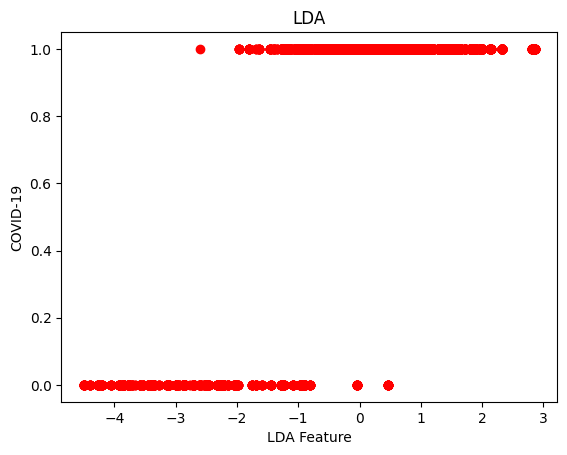

In [147]:
# Visualisasi data yang sudah terproses LDA dengan plot
# plot x dan y setelah LDA
plt.scatter(X_train_lda, y_train, color = 'red')
plt.title('LDA')
plt.xlabel('LDA Feature')
plt.ylabel('COVID-19')
plt.show()

##### KNeighborsClassifier

In [148]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_lda, y_train)
y_pred = knn.predict(X_test_lda)
#Score/Accuracy
acc_knn=knn.score(X_test_lda, y_test)*100
acc_knn

96.41214351425943

##### Decision Tree Classifier

In [149]:
from sklearn import tree
t = tree.DecisionTreeClassifier()
t.fit(X_train_lda,y_train)
y_pred = t.predict(X_test_lda)
#Score/Accuracy
acc_decisiontree=t.score(X_test_lda, y_test)*100
acc_decisiontree

98.4360625574977

##### Naive Bayes

In [150]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_lda,y_train)
#Score/Accuracy
acc_gaussian= model.score(X_test_lda, y_test)*100
acc_gaussian

95.86016559337627

##### SVM

In [151]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(X_train_lda, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test_lda)
#Score/Accuracy
acc_svc=clf.score(X_test_lda, y_test)*100
acc_svc

95.95216191352345

#### Compare Model

In [152]:
# sort the accuracy scores of the models

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Decision Tree','Naive Bayes'],
    'Score': [acc_svc, acc_knn, acc_decisiontree,acc_gaussian]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Decision Tree,98.436063
1,KNN,96.412144
0,Support Vector Machines,95.952162
3,Naive Bayes,95.860166


### Kesimpulan

#### Confusion Matrix

<AxesSubplot:>

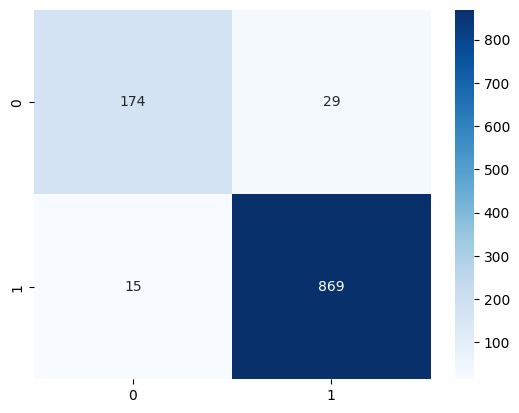

In [153]:
# Menggunakan library sklearn.metrics untuk membuat confusion matrix.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# Dengan menggunakan confusion matrix, kita dapat melihat True Postive (Kiri atas), False Positive (Kanan atas), False Negative (Kiri bawah), dan True Negative (Kanan bawah)

#### Accuracy Score For Prediction

In [154]:
# Melakukan import sklearn.metrics untuk melakukan test akurasi data
from sklearn.metrics import accuracy_score

# Menggunakan data dari y_test dan y_pred, dimana y_test adalah data testing yang sebenarnya, dan y_pred adalah data testing yang telah diprediksi oleh model. 
# Program kami akan mendapatkan akurasi sebesar 96%
print(accuracy_score(y_test, y_pred))

0.9595216191352346


#### Precision Score For Prediction

In [155]:
# Melakukan import sklearn.metrics untuk melakukan classification report
from sklearn.metrics import classification_report

# Menggunakan data dari y_test dan y_pred, dimana y_test adalah data testing yang sebenarnya, dan y_pred adalah data testing yang telah diprediksi oleh model.
# Program kami akan mendapatkan precision, recall, dan f1-score dari data testing yang sebenarnya dan data testing yang telah diprediksi oleh model.
print(classification_report(y_test, y_pred))
# Precision didapatkan dari True Positive dibagi dengan jumlah True Positive dan False Positive
# Recall didapatkan dari True Positive dibagi dengan jumlah True Positive dan False Negative
# F1-Score didapatkan dari 2 dibagi dengan (1/precision) + (1/recall)

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       203
           1       0.97      0.98      0.98       884

    accuracy                           0.96      1087
   macro avg       0.94      0.92      0.93      1087
weighted avg       0.96      0.96      0.96      1087



In [156]:
# Melakukan import sklearn.metrics untuk melakukan roc_auc_score
# roc_auc_score adalah metode untuk mengukur akurasi dari model yang telah dibuat
from sklearn.metrics import roc_auc_score

# Menggunakan data dari y_test dan y_pred, dimana y_test adalah data testing yang sebenarnya, dan y_pred adalah data testing yang telah diprediksi oleh model.
# Program kami akan mendapatkan roc_auc_score sebesar 92%
print(roc_auc_score(y_test, y_pred))
# roc_auc_score didapatkan dari True Positive dibagi dengan jumlah True Positive dan False Positive, ditambah dengan True Negative dibagi dengan jumlah True Negative dan False Negative

# Berdasarkan roc auc score, dapat disimpulkan bahwa model yang kami buat memiliki performa yang sangat baik sebab diatas 80%

0.920087265675501


### Implementation of The Model for user Input 

##### Test 1

In [157]:
Breathing_Problem = 1
Fever = 1
Dry_Cough  = 1
Sore_throat = 1
Running_nose = 1
Heart_Disease = 1
Hyper_Tension = 1
Gastrointestinal = 1
Abroad_travel = 1
Contact_with_COVID_Patient = 1
Attended_Large_Gathering = 1
Visited_Public_Exposed_Places = 1
Family_working_in_Public_Exposed_Places = 1

data = np.array([[Breathing_Problem, Fever, Dry_Cough, Sore_throat, Running_nose, Heart_Disease, Hyper_Tension, Gastrointestinal, Abroad_travel, Contact_with_COVID_Patient, Attended_Large_Gathering, Visited_Public_Exposed_Places, Family_working_in_Public_Exposed_Places]])
data = lda.transform(data)
result = clf.predict(data)

if result == 0:
    print('Not Infected')
else:
    print('Infected')

# Apabila Seseorang memiliki semua gejala maka hasilnya adalah Infected


Infected


#### Test 2

In [158]:
Breathing_Problem = 1
Fever = 0
Dry_Cough  = 1
Sore_throat = 0
Running_nose = 0
Heart_Disease = 0
Hyper_Tension = 0
Gastrointestinal = 0
Abroad_travel = 1
Contact_with_COVID_Patient = 1
Attended_Large_Gathering = 1
Visited_Public_Exposed_Places = 1
Family_working_in_Public_Exposed_Places = 1

data = np.array([[Breathing_Problem, Fever, Dry_Cough, Sore_throat, Running_nose, Heart_Disease, Hyper_Tension, Gastrointestinal, Abroad_travel, Contact_with_COVID_Patient, Attended_Large_Gathering, Visited_Public_Exposed_Places, Family_working_in_Public_Exposed_Places]])
data = lda.transform(data)
result = clf.predict(data)

if result == 0:
    print('Not Infected')
else:
    print('Infected')

# Apabila seseorang memiliki masalah pernapasa, batuk kering, dan sering melakukan kontak dengan pasien covid, mengikuti acara skala besar, 
# sering berkunjung ke tempat terbuka, dan keluarga bekerja di tempat terbuka, maka hasilnya adalah Infected


Infected


#### Test 3

In [159]:
Breathing_Problem = 0
Fever = 0
Dry_Cough  = 0
Sore_throat = 0
Running_nose = 0
Heart_Disease = 0
Hyper_Tension = 0
Gastrointestinal = 0
Abroad_travel = 0
Contact_with_COVID_Patient = 0
Attended_Large_Gathering = 0
Visited_Public_Exposed_Places = 0
Family_working_in_Public_Exposed_Places = 0

data = np.array([[Breathing_Problem, Fever, Dry_Cough, Sore_throat, Running_nose, Heart_Disease, Hyper_Tension, Gastrointestinal, Abroad_travel, Contact_with_COVID_Patient, Attended_Large_Gathering, Visited_Public_Exposed_Places, Family_working_in_Public_Exposed_Places]])
data = lda.transform(data)
result = clf.predict(data)

if result == 0:
    print('Not Infected')
else:
    print('Infected')

# Apabila Seseorang tidak memiliki gejala maka hasilnya adalah Not Infected


Not Infected


#### Test 4

In [160]:
Breathing_Problem = 0
Fever = 0
Dry_Cough  = 0
Sore_throat = 0
Running_nose = 0
Heart_Disease = 0
Hyper_Tension = 0
Gastrointestinal = 0
Abroad_travel = 0
Contact_with_COVID_Patient = 1
Attended_Large_Gathering = 1
Visited_Public_Exposed_Places = 1
Family_working_in_Public_Exposed_Places = 1

data = np.array([[Breathing_Problem, Fever, Dry_Cough, Sore_throat, Running_nose, Heart_Disease, Hyper_Tension, Gastrointestinal, Abroad_travel, Contact_with_COVID_Patient, Attended_Large_Gathering, Visited_Public_Exposed_Places, Family_working_in_Public_Exposed_Places]])
data = lda.transform(data)
result = clf.predict(data)

if result == 0:
    print('Not Infected')
else:
    print('Infected')

# Apabila Seseorang sering melakukan kontak dengan pasien covid, mengikuti acara skala besar, sering mengunjungi tempat terbuka, dan keluarga bekerja di tempat terbuka, maka hasilnya adalah Not Infected


Not Infected


In [161]:
# Membuat Fungsi Predict_Result
def predict_result():
    # Mengambil Imput dari user
    Breathing_Problem = int(input('Breathing Problem: '))
    Fever = int(input('Fever: '))
    Dry_Cough = int(input('Dry Cough: '))
    Sore_throat = int(input('Sore throat: '))
    Running_nose = int(input('Running nose: '))
    Heart_Disease = int(input('Heart Disease: '))
    Hyper_Tension = int(input('Hyper Tension: '))
    Gastrointestinal = int(input('Gastrointestinal: '))
    Abroad_travel = int(input('Abroad travel: '))
    Contact_with_COVID_Patient = int(input('Contact with COVID Patient: '))
    Attended_Large_Gathering = int(input('Attended Large Gathering: '))
    Visited_Public_Exposed_Places = int(input('Visited Public Exposed Places: '))
    Family_working_in_Public_Exposed_Places = int(input('Family working in Public Exposed Places: '))
    
    # Membuat dataframe array dengan numpy untuk menyimpan input user
    data = np.array([[Breathing_Problem, Fever, Dry_Cough, Sore_throat, Running_nose, Heart_Disease, Hyper_Tension, Gastrointestinal, Abroad_travel, Contact_with_COVID_Patient, Attended_Large_Gathering, Visited_Public_Exposed_Places, Family_working_in_Public_Exposed_Places]])

    # melakukan transformasi LDA agar data terlihat seperti data training
    data = lda.transform(data)

    # memprediksi hasil dengan metode SVM
    result = clf.predict(data)

    # print the result
    if result == 0:
        print('Not Infected')
    else:
        print('Infected')

# Memanggil Fungsi predict_result() untuk mencoba prediksi
predict_result()

# Hasil dibawah didapatkan dari hasil prediksi 1,0,1,0,1,0,1,0,1,0,1,0,1

Infected
